In [ ]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing pandas and numpy
import pandas as pd,numpy as np

In [ ]:
#importing all datasets
churn_data=pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_data =pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [ ]:
df1=pd.merge(churn_data,customer_data,how="inner",on="customerID")

In [ ]:
telecom=pd.merge(df1,internet_data,how='inner',on="customerID")

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
telecom.shape


(7043, 21)

In [ ]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']

def binary_map(x):
  return x.map({'Yes':1,'No':0})

telecom[varlist]=telecom[varlist].apply(binary_map)

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [ ]:
dummy1 =pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

telecom= pd.concat([telecom,dummy1],axis=1)

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [ ]:
telecom['MultipleLines'].astype('category').value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
telecom['PaymentMethod'].astype('category').value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
telecom['PaperlessBilling'].astype('category').value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [ ]:
telecom['InternetService'].astype('category').value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
telecom['OnlineSecurity'].astype('category').value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
telecom['OnlineBackup'].astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [ ]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'.
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'.
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'.
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
telecom= telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],1)

In [ ]:
telecom['TotalCharges']=pd.to_numeric(telecom.TotalCharges,errors='coerce')

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [ ]:
num_telecom=telecom[['TotalCharges','tenure','MonthlyCharges','SeniorCitizen']]

In [ ]:
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalCharges,tenure,MonthlyCharges,SeniorCitizen
count,7032.000000,7043.000000,7043.000000,7043.000000
mean,2283.300441,32.371149,64.761692,0.162147
std,2266.771362,24.559481,30.090047,0.368612
min,18.800000,0.000000,18.250000,0.000000
25%,401.450000,9.000000,35.500000,0.000000
50%,1397.475000,29.000000,70.350000,0.000000
75%,3794.737500,55.000000,89.850000,0.000000
90%,5976.640000,69.000000,102.600000,1.000000
95%,6923.590000,72.000000,107.400000,1.000000
99%,8039.883000,72.000000,114.729000,1.000000


In [ ]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [ ]:
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [ ]:
round(100*(telecom.isnull().sum()/len(telecom.index)))

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=telecom.drop(['Churn','customerID'],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
y=telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [ ]:
churn=(sum(telecom['Churn'])/len(telecom['Churn']))*100
churn

26.578498293515356

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


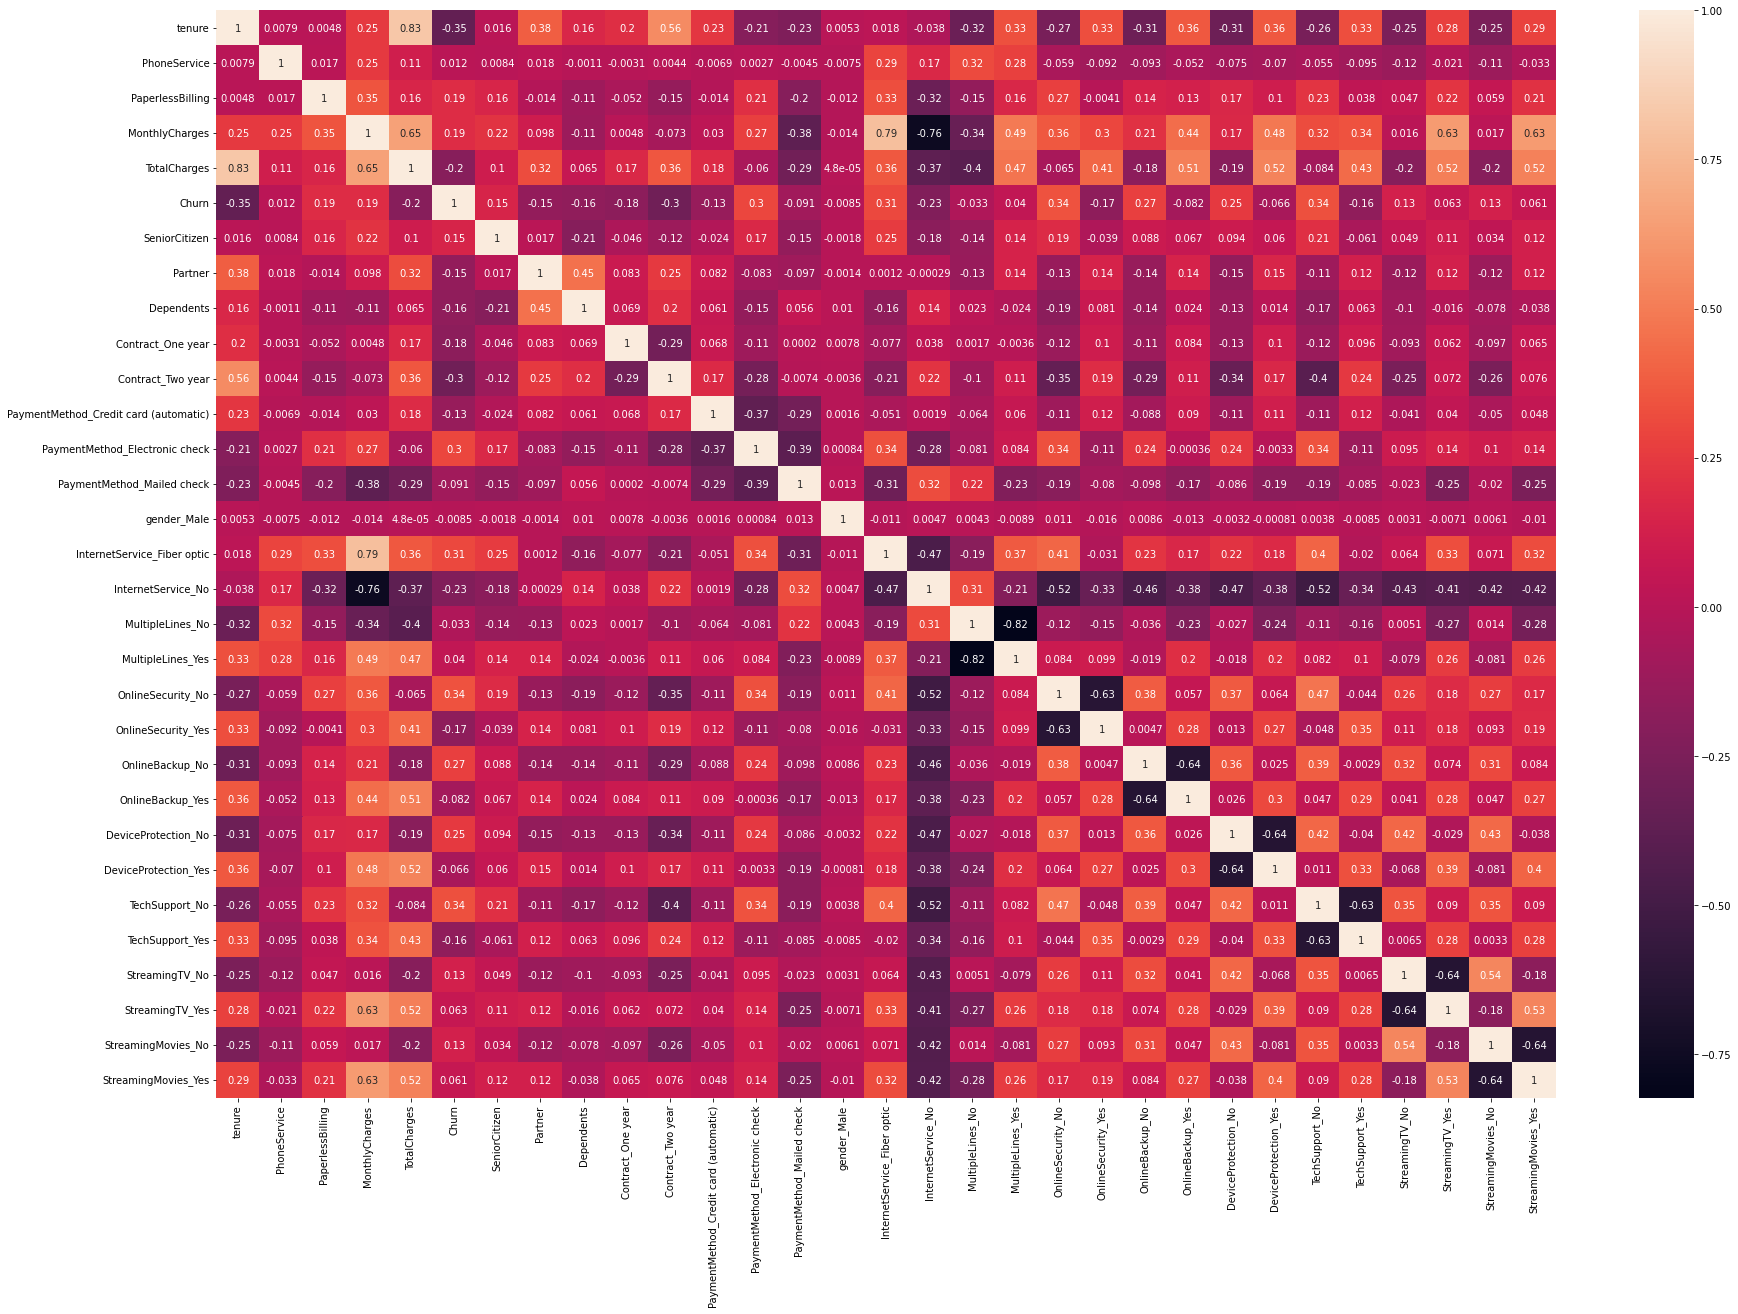

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(telecom.corr(),annot=True)

In [ ]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

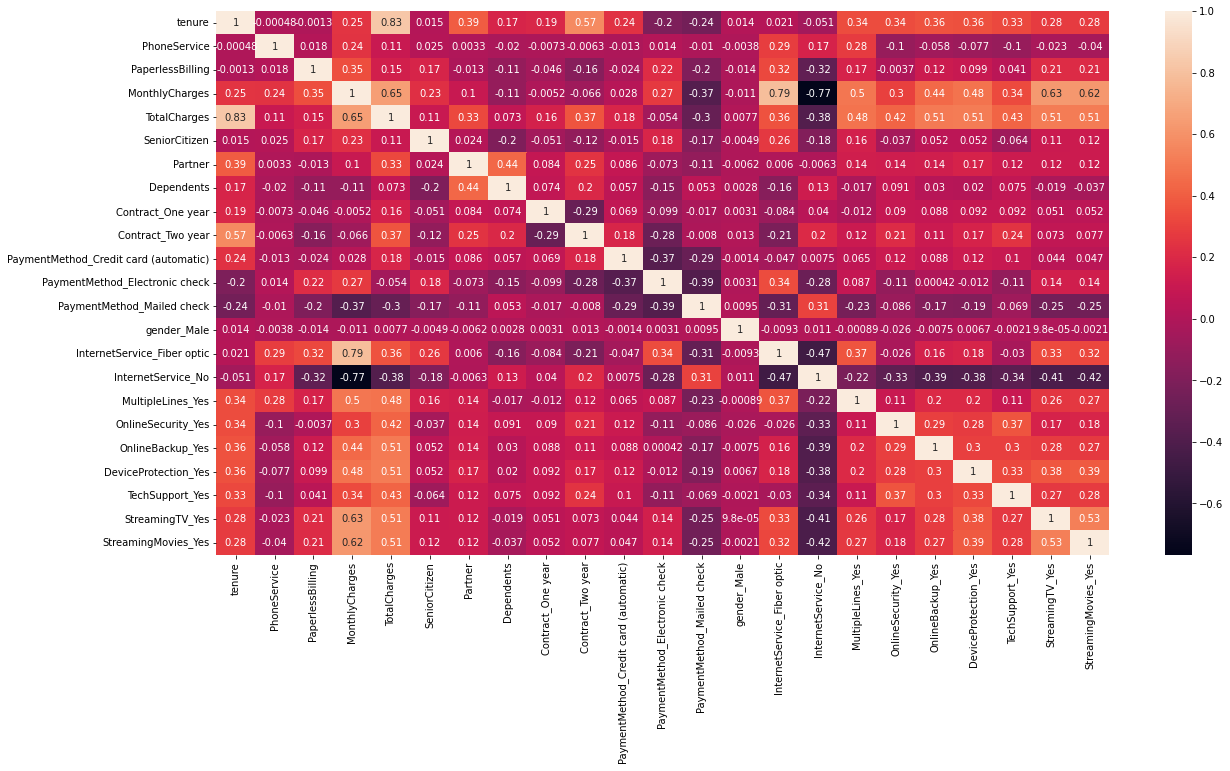

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)

In [ ]:
import statsmodels.api as sm

In [ ]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 02 Jul 2022   Deviance:                       4009.4
Time:                        12:05:43   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,step=15)
rfe=rfe.fit(X_train,y_train)

In [ ]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False, False])

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 2),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 2),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 2),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 2),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 2),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 2),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 2),
 ('StreamingMovies_Yes', False, 2)]

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:

X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [ ]:
#creating the stats using y_train and x_train with filtered variable
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.4
Date:                Sat, 02 Jul 2022   Deviance:                       4058.8
Time:                        12:05:44   Pearson chi2:                 6.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0413      0.159     -6.549      0.000      -1.353      -0.730
tenure                         -1.6383      0.179     -9.144      0.000      -1.989      -1.287
PhoneService                   -0.5284      0.158     -3.351      0.001      -0.837      -0.219
PaperlessBilling                0.3857      0.089      4.342      0.000       0.212       0.560
TotalCharges                    0.9172      0.178      5.164      0.000       0.569       1.265
SeniorCitizen                   0.4661      0.098      4.734      0.000       0.273       0.659
Contract_One year              -0.6951      0.127     -5.489      0.000      -0.943      -0.447
Contract_Two year              -1.3206      0.211     -6.267      0.000      -1.734      -0.908
InternetService_Fiber optic     0.8495      0.115      7.372      0.000       0.624       1.075
InternetService_No             -1.0987      0.163     -6.754      0.000      -1.417      -0.780
OnlineSecurity_Yes             -0.4463      0.101     -4.411      0.000      -0.645      -0.248
TechSupport_Yes                -0.4113      0.101     -4.078      0.000      -0.609      -0.214
===============================================================================================
"""

In [ ]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

879     0.186973
5790    0.221098
6498    0.706631
880     0.452262
2784    0.597300
3874    0.407458
5387    0.395341
6623    0.792946
4465    0.173628
5364    0.587858
dtype: float64

In [ ]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']= y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
879,0,0.186973,879
5790,0,0.221098,5790
6498,1,0.706631,6498
880,1,0.452262,880
2784,1,0.597300,2784


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
879,0,0.186973,879,0
5790,0,0.221098,5790,0
6498,1,0.706631,6498,1
880,1,0.452262,880,0
2784,1,0.597300,2784,1


In [ ]:
from sklearn import metrics

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3258  377]
 [ 581  706]]


          Predicted   not churn churn

Actual.           

                    
not churn.        3258.  377   
                  
                  
                  
                  581.   706
churn

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8053636733035352


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif= pd.DataFrame()
vif['Feature']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Feature,VIF
1,PhoneService,7.53
3,TotalCharges,6.70
0,tenure,6.43
7,InternetService_Fiber optic,3.86
6,Contract_Two year,3.14
8,InternetService_No,3.11
2,PaperlessBilling,2.58
10,TechSupport_Yes,2.04
9,OnlineSecurity_Yes,1.87
5,Contract_One year,1.86


In [ ]:
col=col.drop('PhoneService',1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [ ]:
X_train_sm=sm.add_constant(X_train[col])
logm3 =sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4911
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2035.0
Date:                Sat, 02 Jul 2022   Deviance:                       4070.0
Time:                        12:05:44   Pearson chi2:                 6.28e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4052      0.118    -11.896      0.000      -1.637      -1.174
tenure                         -1.5230      0.176     -8.664      0.000      -1.868      -1.178
PaperlessBilling                0.3878      0.089      4.376      0.000       0.214       0.561
TotalCharges                    0.8029      0.175      4.599      0.000       0.461       1.145
SeniorCitizen                   0.4804      0.098      4.888      0.000       0.288       0.673
Contract_One year              -0.6954      0.126     -5.498      0.000      -0.943      -0.447
Contract_Two year              -1.3059      0.210     -6.210      0.000      -1.718      -0.894
InternetService_Fiber optic     0.7209      0.107      6.711      0.000       0.510       0.931
InternetService_No             -1.2607      0.154     -8.166      0.000      -1.563      -0.958
OnlineSecurity_Yes             -0.4513      0.101     -4.466      0.000      -0.649      -0.253
TechSupport_Yes                -0.4192      0.101     -4.165      0.000      -0.616      -0.222
===============================================================================================
"""

In [ ]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([0.21936663, 0.17178828, 0.70687985, 0.44783518, 0.59526661,
       0.44437051, 0.30548355, 0.79554054, 0.13117564, 0.58901727])

In [ ]:
y_train_pred_final['Churn_Prob']=y_train_pred

In [ ]:
y_train_pred_final['Predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,Predicted
879,0,0.219367,879,0,0
5790,0,0.171788,5790,0,0
6498,1,0.706880,6498,1,1
880,1,0.447835,880,0,0
2784,1,0.595267,2784,1,1


In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8053636733035352


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,6.69
0,tenure,6.26
5,Contract_Two year,2.92
6,InternetService_Fiber optic,2.56
1,PaperlessBilling,2.32
7,InternetService_No,2.22
9,TechSupport_Yes,1.93
8,OnlineSecurity_Yes,1.74
4,Contract_One year,1.73
3,SeniorCitizen,1.29


In [ ]:
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2046.3
Date:                Sat, 02 Jul 2022   Deviance:                       4092.6
Time:                        12:05:44   Pearson chi2:                 5.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.4403      0.116    -12.420      0.000      -1.668      -1.213
tenure                         -0.7821      0.060    -13.022      0.000      -0.900      -0.664
PaperlessBilling                0.3884      0.088      4.397      0.000       0.215       0.562
SeniorCitizen                   0.4926      0.099      4.990      0.000       0.299       0.686
Contract_One year              -0.6732      0.125     -5.377      0.000      -0.919      -0.428
Contract_Two year              -1.2475      0.207     -6.023      0.000      -1.653      -0.842
InternetService_Fiber optic     0.9792      0.092     10.677      0.000       0.799       1.159
InternetService_No             -1.3089      0.153     -8.557      0.000      -1.609      -1.009
OnlineSecurity_Yes             -0.4094      0.101     -4.065      0.000      -0.607      -0.212
TechSupport_Yes                -0.3422      0.099     -3.445      0.001      -0.537      -0.148
===============================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([0.25592816, 0.21573778, 0.71775459, 0.47363235, 0.62136573,
       0.42527284, 0.29479009, 0.80626468, 0.15755149, 0.59645442])

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,Predicted
879,0,0.255928,879,0,0
5790,0,0.215738,5790,0,0
6498,1,0.717755,6498,1,1
880,1,0.473632,880,0,0
2784,1,0.621366,2784,1,1


In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7988622511174319


In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.87
1,PaperlessBilling,2.29
5,InternetService_Fiber optic,2.00
8,TechSupport_Yes,1.88
6,InternetService_No,1.81
0,tenure,1.76
3,Contract_One year,1.73
7,OnlineSecurity_Yes,1.73
2,SeniorCitizen,1.29


In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3278,  357],
       [ 633,  654]])

In [ ]:
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7988622511174319

#METRICS BEYOND SIMPLE ACCURACY

In [ ]:
TP =confusion[1,1]
FP=confusion[0,1]
TN=confusion[0,0]
FN=confusion[1,0]

In [ ]:
TP/float(TP+FN)

0.5081585081585082

In [ ]:
TN/float(TN+FP)

0.9017881705639614

In [ ]:
print(TP/float(TP+FN))

0.5081585081585082


In [ ]:
FP/(TN+FP)

0.09821182943603851

In [ ]:
TN/(TN+FN)

0.8381488110457683

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr,tpr,thresholds= metrics.roc_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob,drop_intermediate=False)

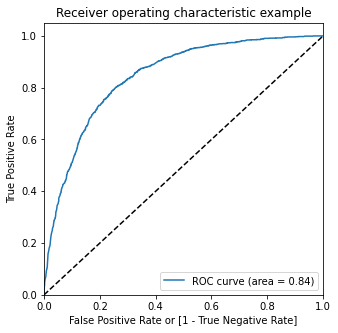

In [ ]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

In [ ]:
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.255928,879,0,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.215738,5790,0,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.717755,6498,1,1,1,1,1,1,1,1,1,1,0,0
880,1,0.473632,880,0,0,1,1,1,1,1,0,0,0,0,0
2784,1,0.621366,2784,1,1,1,1,1,1,1,1,1,0,0,0


In [ ]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.608696  0.944056  0.489959
0.2   0.2  0.719220  0.859363  0.669601
0.3   0.3  0.766152  0.777778  0.762036
0.4   0.4  0.796424  0.651127  0.847868
0.5   0.5  0.798862  0.508159  0.901788
0.6   0.6  0.797440  0.387723  0.942503
0.7   0.7  0.772653  0.190365  0.978817
0.8   0.8  0.747460  0.039627  0.998074
0.9   0.9  0.738521  0.000000  1.000000


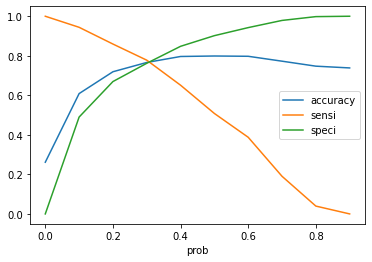

In [ ]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

##Step -11 Making predictions on the test set

In [ ]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [ ]:
X_test=X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes
942,-0.347623,1,0,0,0,1,0,0,0
3730,0.999203,1,0,0,0,1,0,0,0
1761,1.040015,1,0,0,1,0,1,0,0
2283,-1.286319,1,0,0,0,1,0,0,0
1872,0.346196,0,0,0,1,0,1,0,0


In [ ]:
X_test_sm=sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

942     0.549635
3730    0.298561
1761    0.011873
2283    0.717755
1872    0.013825
1970    0.677396
2532    0.296030
1616    0.013899
2485    0.626772
5914    0.124341
dtype: float64

In [ ]:
#converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

,0
942,0.549635
3730,0.298561
1761,0.011873
2283,0.717755
1872,0.013825


In [ ]:
y_test_df=pd.DataFrame(y_test)